In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df['age_group'] = pd.cut(df['age'], bins=[0,2,4,6,10], labels=['young','mid','adult','old'])
dt=df
df=df.drop('age',axis=1)

df.head()

,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_group
0,1,1,Vic,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,old
1,2,1,Vic,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,adult
2,3,1,Vic,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,adult
3,4,1,Vic,f,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,adult
4,5,1,Vic,f,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,young


In [4]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
df['age_group']=le.fit_transform(df['age_group'])


In [5]:
df.head()

,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_group
0,1,1,Vic,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,2
1,2,1,Vic,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,3,1,Vic,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,4,1,Vic,f,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,5,1,Vic,f,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,3


In [6]:
df =df.drop(['Pop','case','site','sex'],axis=1)
df.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_group
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,2
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,3


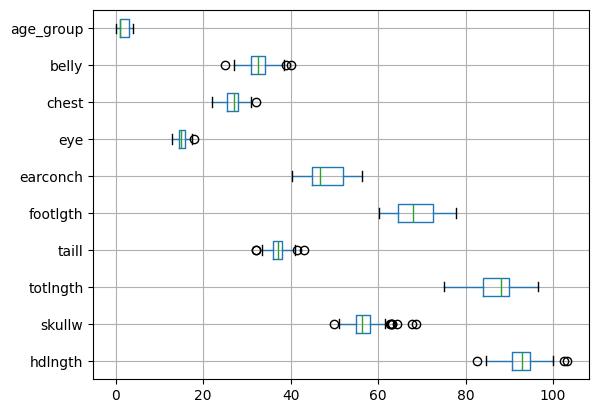

In [7]:
df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

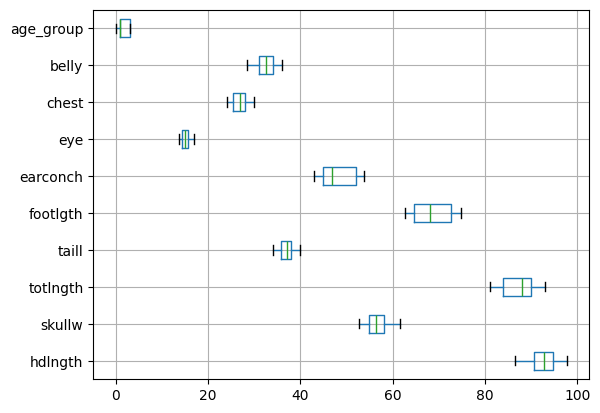

In [8]:
from scipy.stats.mstats import winsorize

for i in df.columns:
    df[i]=winsorize(df[i],limits=[0.07,0.07])

df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

x=df.drop('age_group',axis=1)
y=df['age_group']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(x_test)
print("mean_absolute_error :",mean_absolute_error(y_test,y_pred))
print("mean_squared_error :",mean_squared_error(y_test,y_pred))
print("R2 :",r2_score(y_test,y_pred))

mean_absolute_error : 0.9338884170377264
mean_squared_error : 1.4788966828130659
R2 : -0.26229060300711193


In [11]:
dt.head()
dt=dt.drop(['case','site','Pop','sex','age'],axis=1)
dt.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_group
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,old
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,adult
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,adult
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,adult
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,young


In [12]:
x1=dt.drop('age_group',axis=1)
x1

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


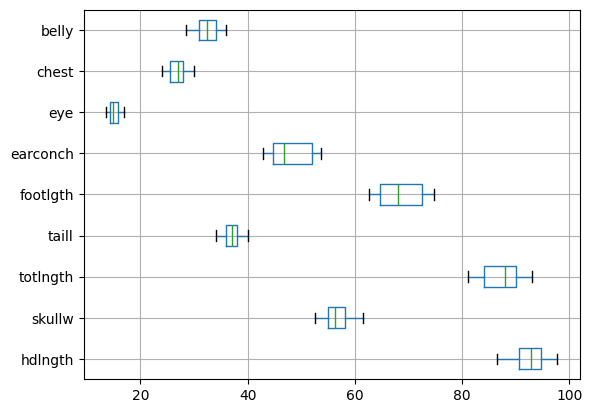

In [13]:
x1=dt.drop('age_group',axis=1)
y1=dt['age_group']
for i in x1.columns:
    x1[i]=winsorize(x1[i],limits=[0.07,0.07])

x1.select_dtypes(include="number").boxplot(vert=False)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

X1_train,X1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

lgr = LogisticRegression(max_iter=500)
lgr.fit(X1_train, y1_train)

y1_pred = lgr.predict(X1_test)

print(classification_report(y1_test, y1_pred))
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: '<' not supported between instances of 'float' and 'str'